In [1]:
from os import listdir
from collections import Counter
from joblib import dump, load

In [2]:
import skimage
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
from skimage.feature import hog 

In [47]:
import pickle

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
path = fr'Fruit-Images-Dataset-master/Test'
path_names = listdir(path)

In [6]:
path_names

['Apple Braeburn',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cauliflower',
 'Cherry 1',
 'Chestnut',
 'Corn',
 'Dates']

In [7]:
data = {}
data['datas'] = []
data['labels'] = []
data['filenames'] = []
include_names = [
    'Apple Braeburn',
    'Banana Red',
    'Beetroot',
    'Blueberry',]
current_path = []

In [8]:
for i in path_names:
    if i in include_names:
        current_path.append(path+'/'+i)

In [9]:
current_path

['Fruit-Images-Dataset-master/Test/Apple Braeburn',
 'Fruit-Images-Dataset-master/Test/Banana Red',
 'Fruit-Images-Dataset-master/Test/Beetroot',
 'Fruit-Images-Dataset-master/Test/Blueberry']

In [10]:
for i in current_path:
    print(i)

Fruit-Images-Dataset-master/Test/Apple Braeburn
Fruit-Images-Dataset-master/Test/Banana Red
Fruit-Images-Dataset-master/Test/Beetroot
Fruit-Images-Dataset-master/Test/Blueberry


In [11]:
listdir(current_path[0])

['321_100.jpg',
 '322_100.jpg',
 '323_100.jpg',
 '324_100.jpg',
 '325_100.jpg',
 '326_100.jpg',
 '327_100.jpg',
 '32_100.jpg',
 '33_100.jpg',
 '34_100.jpg',
 '35_100.jpg',
 '36_100.jpg',
 '37_100.jpg',
 '38_100.jpg',
 '39_100.jpg',
 '3_100.jpg',
 '40_100.jpg',
 '41_100.jpg',
 '42_100.jpg',
 '43_100.jpg',
 '44_100.jpg',
 '45_100.jpg',
 '46_100.jpg',
 '47_100.jpg',
 '48_100.jpg',
 '49_100.jpg',
 '4_100.jpg',
 '50_100.jpg',
 '51_100.jpg',
 '52_100.jpg',
 '53_100.jpg',
 '54_100.jpg',
 '55_100.jpg',
 '56_100.jpg',
 '57_100.jpg',
 '58_100.jpg',
 '59_100.jpg',
 '5_100.jpg',
 '60_100.jpg',
 '61_100.jpg',
 '62_100.jpg',
 '63_100.jpg',
 '64_100.jpg',
 '65_100.jpg',
 '66_100.jpg',
 '67_100.jpg',
 '68_100.jpg',
 '69_100.jpg',
 '6_100.jpg',
 '70_100.jpg',
 '71_100.jpg',
 '72_100.jpg',
 '73_100.jpg',
 '74_100.jpg',
 '75_100.jpg',
 '76_100.jpg',
 '77_100.jpg',
 '78_100.jpg',
 '79_100.jpg',
 '7_100.jpg',
 '80_100.jpg',
 '81_100.jpg',
 '82_100.jpg',
 '83_100.jpg',
 '84_100.jpg',
 '85_100.jpg',
 '86_100

In [12]:
include_names[1]

'Banana Red'

In [13]:
for i, n in zip(current_path, range(len(current_path))):
    for j in listdir(i):
        data['labels'].append(include_names[n])
        data['filenames'].append(i+'/'+j)
        data['datas'].append(imread(i+'/'+j)) 

In [14]:
# len(data['filenames'])
# len(data['datas'])

<function matplotlib.pyplot.show(close=None, block=None)>

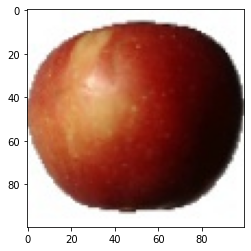

In [15]:
plt.imshow(data['datas'][0])
plt.show

In [16]:
Counter(data['labels'])

Counter({'Apple Braeburn': 164,
         'Banana Red': 166,
         'Beetroot': 150,
         'Blueberry': 154})

In [17]:
dump(data, 'fruit.joblib')

['fruit.joblib']

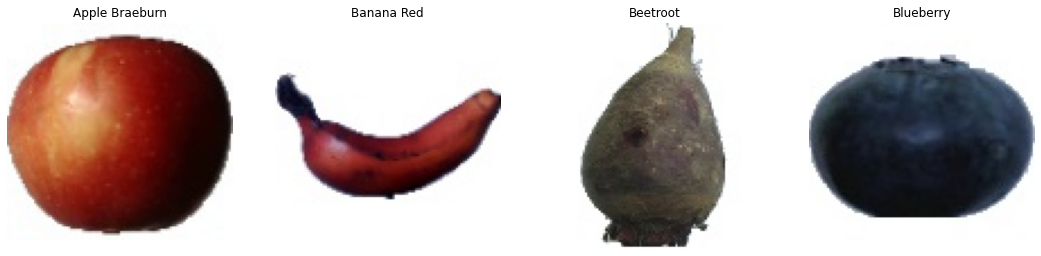

In [18]:
labels = np.unique(data['labels'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['labels'].index(label)
     
    ax.imshow(data['datas'][idx])
    ax.axis('off')
    ax.set_title(label)

In [19]:
x = np.array(data['datas'])
y = np.array(data['labels'])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

<function matplotlib.pyplot.show(close=None, block=None)>

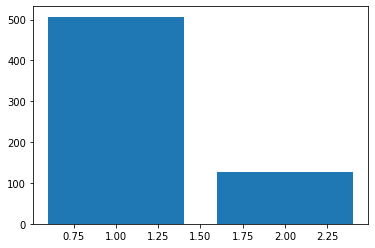

In [21]:
plt.bar([1,2], [len(x_train) ,len(x_test)])
plt.show

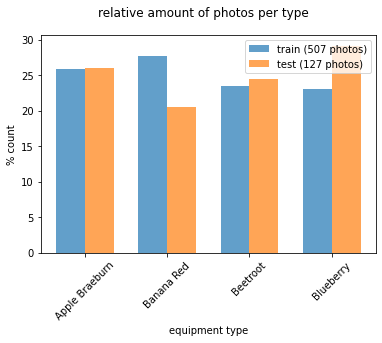

In [22]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [23]:
def hogging(x):
    apple_hog, apple_hog_img = hog(
    x, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
    return apple_hog_img

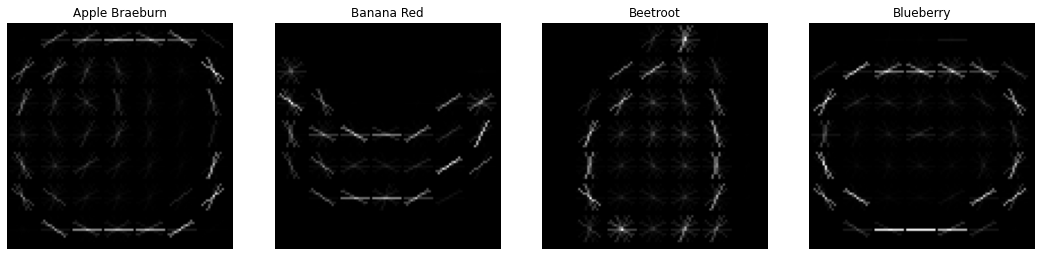

In [24]:
labels = np.unique(data['labels'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['labels'].index(label)
    new_img= hogging(imread(data['filenames'][idx], as_gray=True) )
    ax.imshow(new_img, cmap = 'gray')
    ax.axis('off')
    ax.set_title(label)

In [26]:
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [27]:

 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
x_train_gray = grayify.fit_transform(x_train)
x_train_hog = hogify.fit_transform(x_train_gray)
x_train_prepared = scalify.fit_transform(x_train_hog)
 
print(x_train_prepared.shape)

(507, 1296)


In [28]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(x_train_prepared, y_train)

SGDClassifier(random_state=42)

In [29]:
x_test_gray = grayify.fit_transform(x_test)
x_test_hog = hogify.fit_transform(x_test_gray)
x_test_prepared = scalify.fit_transform(x_test_hog)

In [30]:
sgd_clf.predict(x_test_prepared)

array(['Beetroot', 'Banana Red', 'Banana Red', 'Beetroot',
       'Apple Braeburn', 'Apple Braeburn', 'Beetroot', 'Beetroot',
       'Apple Braeburn', 'Banana Red', 'Apple Braeburn', 'Beetroot',
       'Beetroot', 'Beetroot', 'Beetroot', 'Blueberry', 'Banana Red',
       'Blueberry', 'Blueberry', 'Banana Red', 'Beetroot', 'Beetroot',
       'Banana Red', 'Banana Red', 'Banana Red', 'Apple Braeburn',
       'Banana Red', 'Banana Red', 'Banana Red', 'Blueberry', 'Beetroot',
       'Blueberry', 'Apple Braeburn', 'Blueberry', 'Blueberry',
       'Blueberry', 'Blueberry', 'Beetroot', 'Apple Braeburn',
       'Apple Braeburn', 'Apple Braeburn', 'Blueberry', 'Apple Braeburn',
       'Banana Red', 'Blueberry', 'Blueberry', 'Apple Braeburn',
       'Banana Red', 'Blueberry', 'Apple Braeburn', 'Banana Red',
       'Banana Red', 'Banana Red', 'Blueberry', 'Blueberry', 'Beetroot',
       'Blueberry', 'Banana Red', 'Banana Red', 'Apple Braeburn',
       'Blueberry', 'Blueberry', 'Banana Red', 'Bana

In [31]:
y_pred = sgd_clf.predict(x_test_prepared)
print(np.array(y_pred == y_test)[:25])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


In [43]:
# x_test_prepared.shape
len(x_test_prepared)

127

In [44]:
# x_test.shape
len(x_test)

127

<function matplotlib.pyplot.show(close=None, block=None)>

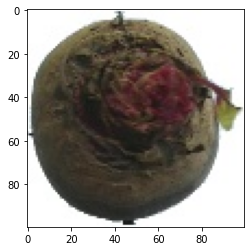

In [40]:
plt.imshow(x_test[0])
plt.show

In [32]:
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))


Percentage correct:  100.0


In [33]:
np.array(y_pred)[0]

'Beetroot'

In [34]:
np.array(y_test)[0]

'Beetroot'

In [46]:
sgd_clf.predict([x_test_prepared[0]])

array(['Beetroot'], dtype='<U14')

In [48]:
dump(sgd_clf, 'sgd_fruit.pickle')

['sgd_fruit.pickle']